In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### This is experiment. 'Total_charges' is removed. 

In [2]:
# load the file
data = pd.read_csv('../data/cleaned_data/re_semi_cleaned_data.csv')
data.head()

,senior_citizen,partner,dependents,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,No,Yes,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,No,No,No,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,No,No,No,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,No,No,No,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.shape

(7032, 17)

### removed 'total_charges'

In [4]:
#data = data.drop('total_charges', axis=1)

####  now, divide the data split numerical and categorical. 

In [5]:
numericals = data.select_dtypes(np.number)
categoricals = data.select_dtypes(exclude=np.number)

In [6]:
numericals

,monthly_charges,total_charges
0,29.85,29.85
1,56.95,1889.50
2,53.85,108.15
3,42.30,1840.75
4,70.70,151.65
...,...,...
7027,84.80,1990.50
7028,103.20,7362.90
7029,29.60,346.45
7030,74.40,306.60


In [7]:
numericals.describe()

,monthly_charges,total_charges
count,7032.000000,7032.000000
mean,64.798208,2283.300441
std,30.085974,2266.771362
min,18.250000,18.800000
25%,35.587500,401.450000
50%,70.350000,1397.475000
75%,89.862500,3794.737500
max,118.750000,8684.800000


In [8]:
# The target 'stroke' is dropped and merged later.
categoricals = categoricals.drop('churn', axis=1)

In [9]:
categoricals

,senior_citizen,partner,dependents,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method
0,No,Yes,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,No,No,No,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,No,No,No,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,No,No,No,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,No,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check
7028,No,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic)
7029,No,Yes,Yes,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check
7030,Yes,Yes,No,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check


### numerical columns transformation

In [10]:
from sklearn.preprocessing import PowerTransformer
import pickle



# Columns to apply power transformation
columns_to_transform = ['monthly_charges']

# Initialize the PowerTransformer
pt = PowerTransformer(method='yeo-johnson')

pt.fit(numericals[columns_to_transform])

# Fit and transform the specified columns

numericals[columns_to_transform] = pt.transform(numericals[columns_to_transform])





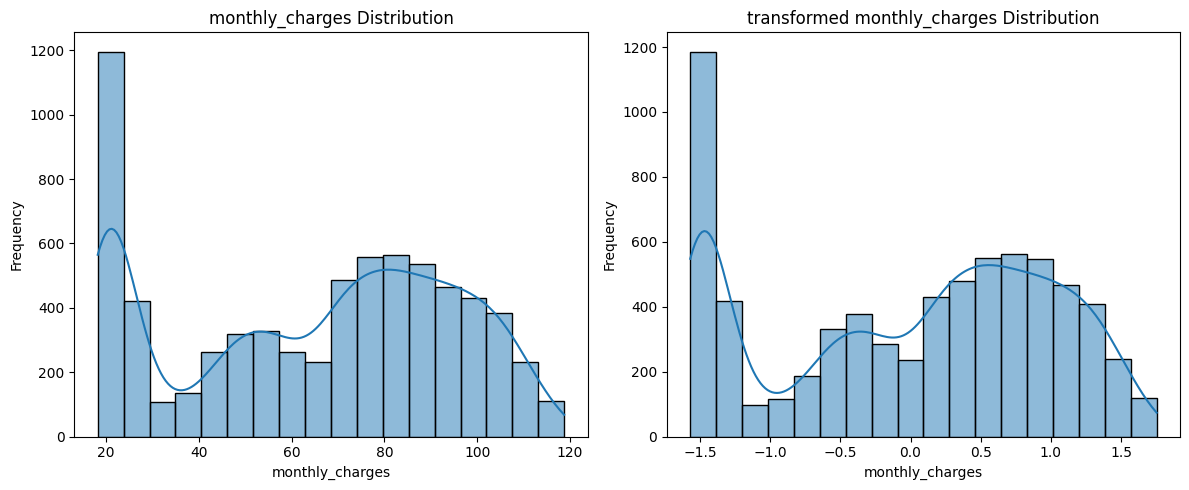

In [11]:
plt.figure(figsize=(12, 5))

# Plot 1
plt.subplot(1, 2, 1)  # 1 row, 2 columns, plot 1
sns.histplot(data['monthly_charges'], kde=True)
# Set plot labels and title
plt.xlabel('monthly_charges')
plt.ylabel('Frequency')
plt.title('monthly_charges Distribution')

# Plot 2
plt.subplot(1, 2, 2)  # 1 row, 2 columns, plot 2
sns.histplot(numericals['monthly_charges'], kde=True)
# Set plot labels and title
plt.xlabel('monthly_charges')
plt.ylabel('Frequency')
plt.title('transformed monthly_charges Distribution')

plt.tight_layout()  # To prevent overlapping of plots
plt.show()

#### standardscaler scaler is appled for numerical columns

In [12]:
from sklearn.preprocessing import StandardScaler

# Create an instance of the StandardScaler
scaler = StandardScaler()

scaler.fit(numericals)

scaled_numericals = scaler.transform(numericals) 




In [13]:
numericals_scaled_df = pd.DataFrame(scaled_numericals, columns=numericals.columns)
numericals_scaled_df.head()

,monthly_charges,total_charges
0,-1.159996,-0.994194
1,-0.241345,-0.173740
2,-0.344532,-0.959649
3,-0.732875,-0.195248
4,0.211884,-0.940457


In [14]:
numericals_scaled_df.shape

(7032, 2)

In [15]:
numericals_scaled_df.describe()

,monthly_charges,total_charges
count,7.032000e+03,7.032000e+03
mean,-2.475583e-17,-1.119064e-16
std,1.000071e+00,1.000071e+00
min,-1.569353e+00,-9.990692e-01
25%,-9.618798e-01,-8.302488e-01
50%,2.004298e-01,-3.908151e-01
75%,8.334544e-01,6.668271e-01
max,1.753419e+00,2.824261e+00


## categorical columns

##### convert categorical columns into dummy variables

In [16]:
encoded_categoricals = pd.get_dummies(categoricals, columns=categoricals.columns, dtype=int)
encoded_categoricals

,senior_citizen_No,senior_citizen_Yes,partner_No,partner_Yes,dependents_No,dependents_Yes,multiple_lines_No,multiple_lines_No phone service,multiple_lines_Yes,internet_service_DSL,...,streaming_movies_Yes,contract_Month-to-month,contract_One year,contract_Two year,paperless_billing_No,paperless_billing_Yes,payment_method_Bank transfer (automatic),payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check
0,1,0,0,1,1,0,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
1,1,0,1,0,1,0,1,0,0,1,...,0,0,1,0,1,0,0,0,0,1
2,1,0,1,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1
3,1,0,1,0,1,0,0,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,1,0,1,0,1,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1,0,0,1,0,1,0,0,1,1,...,1,0,1,0,0,1,0,0,0,1
7028,1,0,0,1,0,1,0,0,1,0,...,1,0,1,0,0,1,0,1,0,0
7029,1,0,0,1,0,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
7030,0,1,0,1,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1


### concatanate columns 

In [17]:
numericals_scaled_df.reset_index(drop=True)
encoded_categoricals.reset_index(drop=True)


,senior_citizen_No,senior_citizen_Yes,partner_No,partner_Yes,dependents_No,dependents_Yes,multiple_lines_No,multiple_lines_No phone service,multiple_lines_Yes,internet_service_DSL,...,streaming_movies_Yes,contract_Month-to-month,contract_One year,contract_Two year,paperless_billing_No,paperless_billing_Yes,payment_method_Bank transfer (automatic),payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check
0,1,0,0,1,1,0,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
1,1,0,1,0,1,0,1,0,0,1,...,0,0,1,0,1,0,0,0,0,1
2,1,0,1,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1
3,1,0,1,0,1,0,0,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,1,0,1,0,1,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1,0,0,1,0,1,0,0,1,1,...,1,0,1,0,0,1,0,0,0,1
7028,1,0,0,1,0,1,0,0,1,0,...,1,0,1,0,0,1,0,1,0,0
7029,1,0,0,1,0,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
7030,0,1,0,1,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1


In [18]:
concatenated_data = pd.concat([numericals_scaled_df,encoded_categoricals, data['churn']], axis=1)
concatenated_data

,monthly_charges,total_charges,senior_citizen_No,senior_citizen_Yes,partner_No,partner_Yes,dependents_No,dependents_Yes,multiple_lines_No,multiple_lines_No phone service,...,contract_Month-to-month,contract_One year,contract_Two year,paperless_billing_No,paperless_billing_Yes,payment_method_Bank transfer (automatic),payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check,churn
0,-1.159996,-0.994194,1,0,0,1,1,0,0,1,...,1,0,0,0,1,0,0,1,0,No
1,-0.241345,-0.173740,1,0,1,0,1,0,1,0,...,0,1,0,1,0,0,0,0,1,No
2,-0.344532,-0.959649,1,0,1,0,1,0,1,0,...,1,0,0,0,1,0,0,0,1,Yes
3,-0.732875,-0.195248,1,0,1,0,1,0,0,1,...,0,1,0,1,0,1,0,0,0,No
4,0.211884,-0.940457,1,0,1,0,1,0,1,0,...,1,0,0,0,1,0,0,1,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.670240,-0.129180,1,0,0,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,No
7028,1.260454,2.241056,1,0,0,1,0,1,0,0,...,0,1,0,0,1,0,1,0,0,No
7029,-1.168685,-0.854514,1,0,0,1,0,1,0,1,...,1,0,0,0,1,0,0,1,0,No
7030,0.332737,-0.872095,0,1,0,1,1,0,0,0,...,1,0,0,0,1,0,0,0,1,Yes


In [19]:
#save the file
concatenated_data.to_csv('../data/cleaned_data/3experiment_re_cleaned_data.csv', index=False)